# Prototype Evaluation

### Background:

Product B is the leader in the South African market in terms of power and premiumness. However, recently the brand has been losing power, has lowered media investment and is selling less volume in last few years. In order to further drive penetration, premiumness and meaning for the brand, AB Inbev plans on bringing a new recipe to market. The goal of this study is thus to understand how the Current Recipe and new Recipe (Prototype 1 or 2) compare to each other in a direct tasting comparison, in order to assess it’s superiority.

### About the Dataset:
The consumer research was conducted in Cape Town among 178 consumers. Each consumer tasted all the 3 products and answered a questionaire consisting of 7 questions for each product.

There are 3 key measures for evaluation - Drinkability, Buying intention, Product Liking and 4 additional diagnostics - Easy drinking, Refreshing, Taste liking, Aftertaste liking.

Evaluation Metric for each measure has been provided in the datamap.

### Objective:
##### Analyse the attached dataset [Full sample and Demographics (Gender & Past 4 weeks Product A consumers)] on the key measures & additional diagnostics
##### Summarize the results and recommend which prototype should to be launched in the market in a powerpoint presentation.


Note: All data manipulations and analysis should be performed in Python only. Final submission should be this notebook(with output saved) and a presentation.

#### Importing or calling all necessary models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

#### DataSet :
#### Loading / Cleaning / Formatting

In [2]:
#loading the given datasets:
df1=pd.read_csv('PrototypeEvaluation.csv')
df1

,Resp_ID,Gender,Age group,Product,S8a,Q2,Q3,Q1,Q6,Q7,Q8,Q9
0,5,1,1,112,6;1,4,8,1,9,7,6,8
1,5,1,1,367,6;1,3,6,1,6,5,5,3
2,5,1,1,853,6;1,3,6,1,6,5,7,6
3,2,1,1,112,1;8;5,3,7,3,6,5,6,6
4,2,1,1,367,1;8;5,4,9,3,9,8,9,8
...,...,...,...,...,...,...,...,...,...,...,...,...
490,102,1,2,367,1;9;10,3,6,3,8,8,8,7
491,102,1,2,853,1;9;10,3,8,3,9,8,6,5
492,101,1,2,112,1;2;10,4,7,1,9,7,8,8
493,101,1,2,367,1;2;10,3,6,1,6,7,5,7


In [3]:
df=pd.DataFrame(data=df1)
df

,Resp_ID,Gender,Age group,Product,S8a,Q2,Q3,Q1,Q6,Q7,Q8,Q9
0,5,1,1,112,6;1,4,8,1,9,7,6,8
1,5,1,1,367,6;1,3,6,1,6,5,5,3
2,5,1,1,853,6;1,3,6,1,6,5,7,6
3,2,1,1,112,1;8;5,3,7,3,6,5,6,6
4,2,1,1,367,1;8;5,4,9,3,9,8,9,8
...,...,...,...,...,...,...,...,...,...,...,...,...
490,102,1,2,367,1;9;10,3,6,3,8,8,8,7
491,102,1,2,853,1;9;10,3,8,3,9,8,6,5
492,101,1,2,112,1;2;10,4,7,1,9,7,8,8
493,101,1,2,367,1;2;10,3,6,1,6,7,5,7


In [4]:
#Shape of the data 
df.shape

(495, 12)

In [5]:
#First ten rows of the data
df.tail(10)

,Resp_ID,Gender,Age group,Product,S8a,Q2,Q3,Q1,Q6,Q7,Q8,Q9
485,100,1,2,853,1;2;4;5;9;10,4,8,3,9,9,7,7
486,103,1,2,112,1;9;4;5,3,8,3,8,7,7,8
487,103,1,2,367,1;9;4;5,4,8,3,7,7,6,7
488,103,1,2,853,1;9;4;5,1,3,1,9,5,2,7
489,102,1,2,112,1;9;10,4,8,3,5,7,9,8
490,102,1,2,367,1;9;10,3,6,3,8,8,8,7
491,102,1,2,853,1;9;10,3,8,3,9,8,6,5
492,101,1,2,112,1;2;10,4,7,1,9,7,8,8
493,101,1,2,367,1;2;10,3,6,1,6,7,5,7
494,101,1,2,853,1;2;10,4,8,3,8,7,8,8


In [6]:
#Information regarding our data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Resp_ID    495 non-null    int64 
 1   Gender     495 non-null    int64 
 2   Age group  495 non-null    int64 
 3   Product    495 non-null    int64 
 4   S8a        495 non-null    object
 5   Q2         495 non-null    int64 
 6   Q3         495 non-null    int64 
 7   Q1         495 non-null    int64 
 8   Q6         495 non-null    int64 
 9   Q7         495 non-null    int64 
 10  Q8         495 non-null    int64 
 11  Q9         495 non-null    int64 
dtypes: int64(11), object(1)
memory usage: 46.5+ KB


In [7]:
df.describe()

,Resp_ID,Gender,Age group,Product,Q2,Q3,Q1,Q6,Q7,Q8,Q9
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,87.527273,1.400000,1.503030,444.000000,3.476768,6.294949,2.329293,6.868687,6.933333,6.244444,6.086869
std,51.640014,0.490394,0.500497,307.683687,1.143086,2.122245,0.850488,2.226299,1.875044,2.307101,2.359949
min,1.000000,1.000000,1.000000,112.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,43.000000,1.000000,1.000000,112.000000,3.000000,5.000000,1.500000,6.000000,6.000000,5.000000,4.000000
50%,85.000000,1.000000,2.000000,367.000000,4.000000,7.000000,3.000000,8.000000,7.000000,7.000000,7.000000
75%,133.000000,2.000000,2.000000,853.000000,4.000000,8.000000,3.000000,9.000000,8.000000,8.000000,8.000000
max,178.000000,2.000000,2.000000,853.000000,5.000000,9.000000,3.000000,9.000000,9.000000,9.000000,9.000000


#### Checking Missing Values

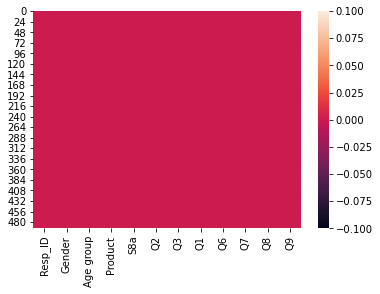

In [8]:
sns.heatmap(df.isnull())

The above graph is here to show that if there are any null values in the above dataset, I have found out that the red color shows the '0' value here, it means that none of the value is empty(Null Values).

In order to get more clearity we have taken out the sum of the total Null Values down which is also giving us the same output that is , ' 0 ' .

In [9]:
df.isnull().sum()

Resp_ID      0
Gender       0
Age group    0
Product      0
S8a          0
Q2           0
Q3           0
Q1           0
Q6           0
Q7           0
Q8           0
Q9           0
dtype: int64

#### Checking Uniqueness in the data :

In [10]:
# only two variant age group present 18 - 34 yo , 35 - 55 yo.
df['Age group'].unique()

array([1, 2])

In [11]:
# Three variant of Product present:  Current Recipe , Prototype 1 , Prototype 2
df['Product'].unique()

array([112, 367, 853])

In [12]:
df['Resp_ID'].unique()

array([  5,   2,   4,   7, 112,   8,   3, 110,   6, 109,   9, 113, 111,
       114,   1,  27,  14,  12,  31,  32, 118,  19,  33, 117,  17,  34,
       116, 128,  23, 124, 115,  22,  28, 119,  35, 120,  11, 122, 131,
       121,  29,  25,  13, 129,  10, 130, 123,  16,  36,  15, 127,  20,
       125,  18, 126,  24,  21,  26,  39,  45,  41, 137,  37,  47, 132,
        46,  52, 134,  42,  40,  44, 138,  38,  51, 133,  49,  48,  50,
        43, 146, 147,  59,  61, 145,  56, 144, 142, 141,  55,  53,  63,
        58,  54, 150, 143, 148,  60, 140,  57, 139,  62, 135, 152,  68,
       153,  69, 136, 154,  65,  67,  70,  66,  77,  75,  76, 151,  78,
       156, 155,  72,  73,  71,  74, 160,  86,  80,  87, 164, 158,  79,
        88,  85,  81, 159, 169, 162,  84, 166, 163,  83, 161,  82, 157,
       165,  89,  90, 167, 168,  92, 171,  95,  94, 174,  96, 176, 178,
       175,  91, 173,  97,  93, 100, 103, 102, 101])

#### Collinearity & Data Visualization

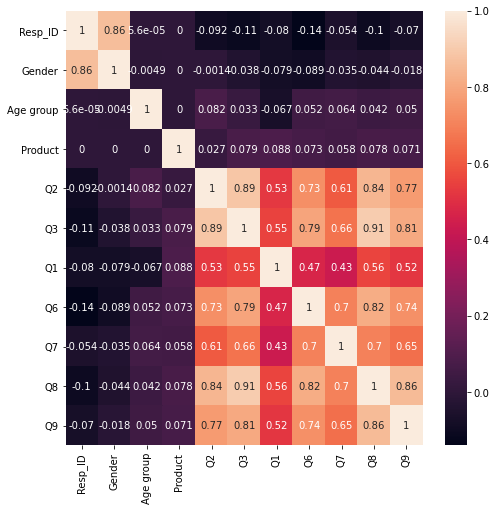

In [13]:
corr_hmap=df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr_hmap,annot=True)
plt.show()

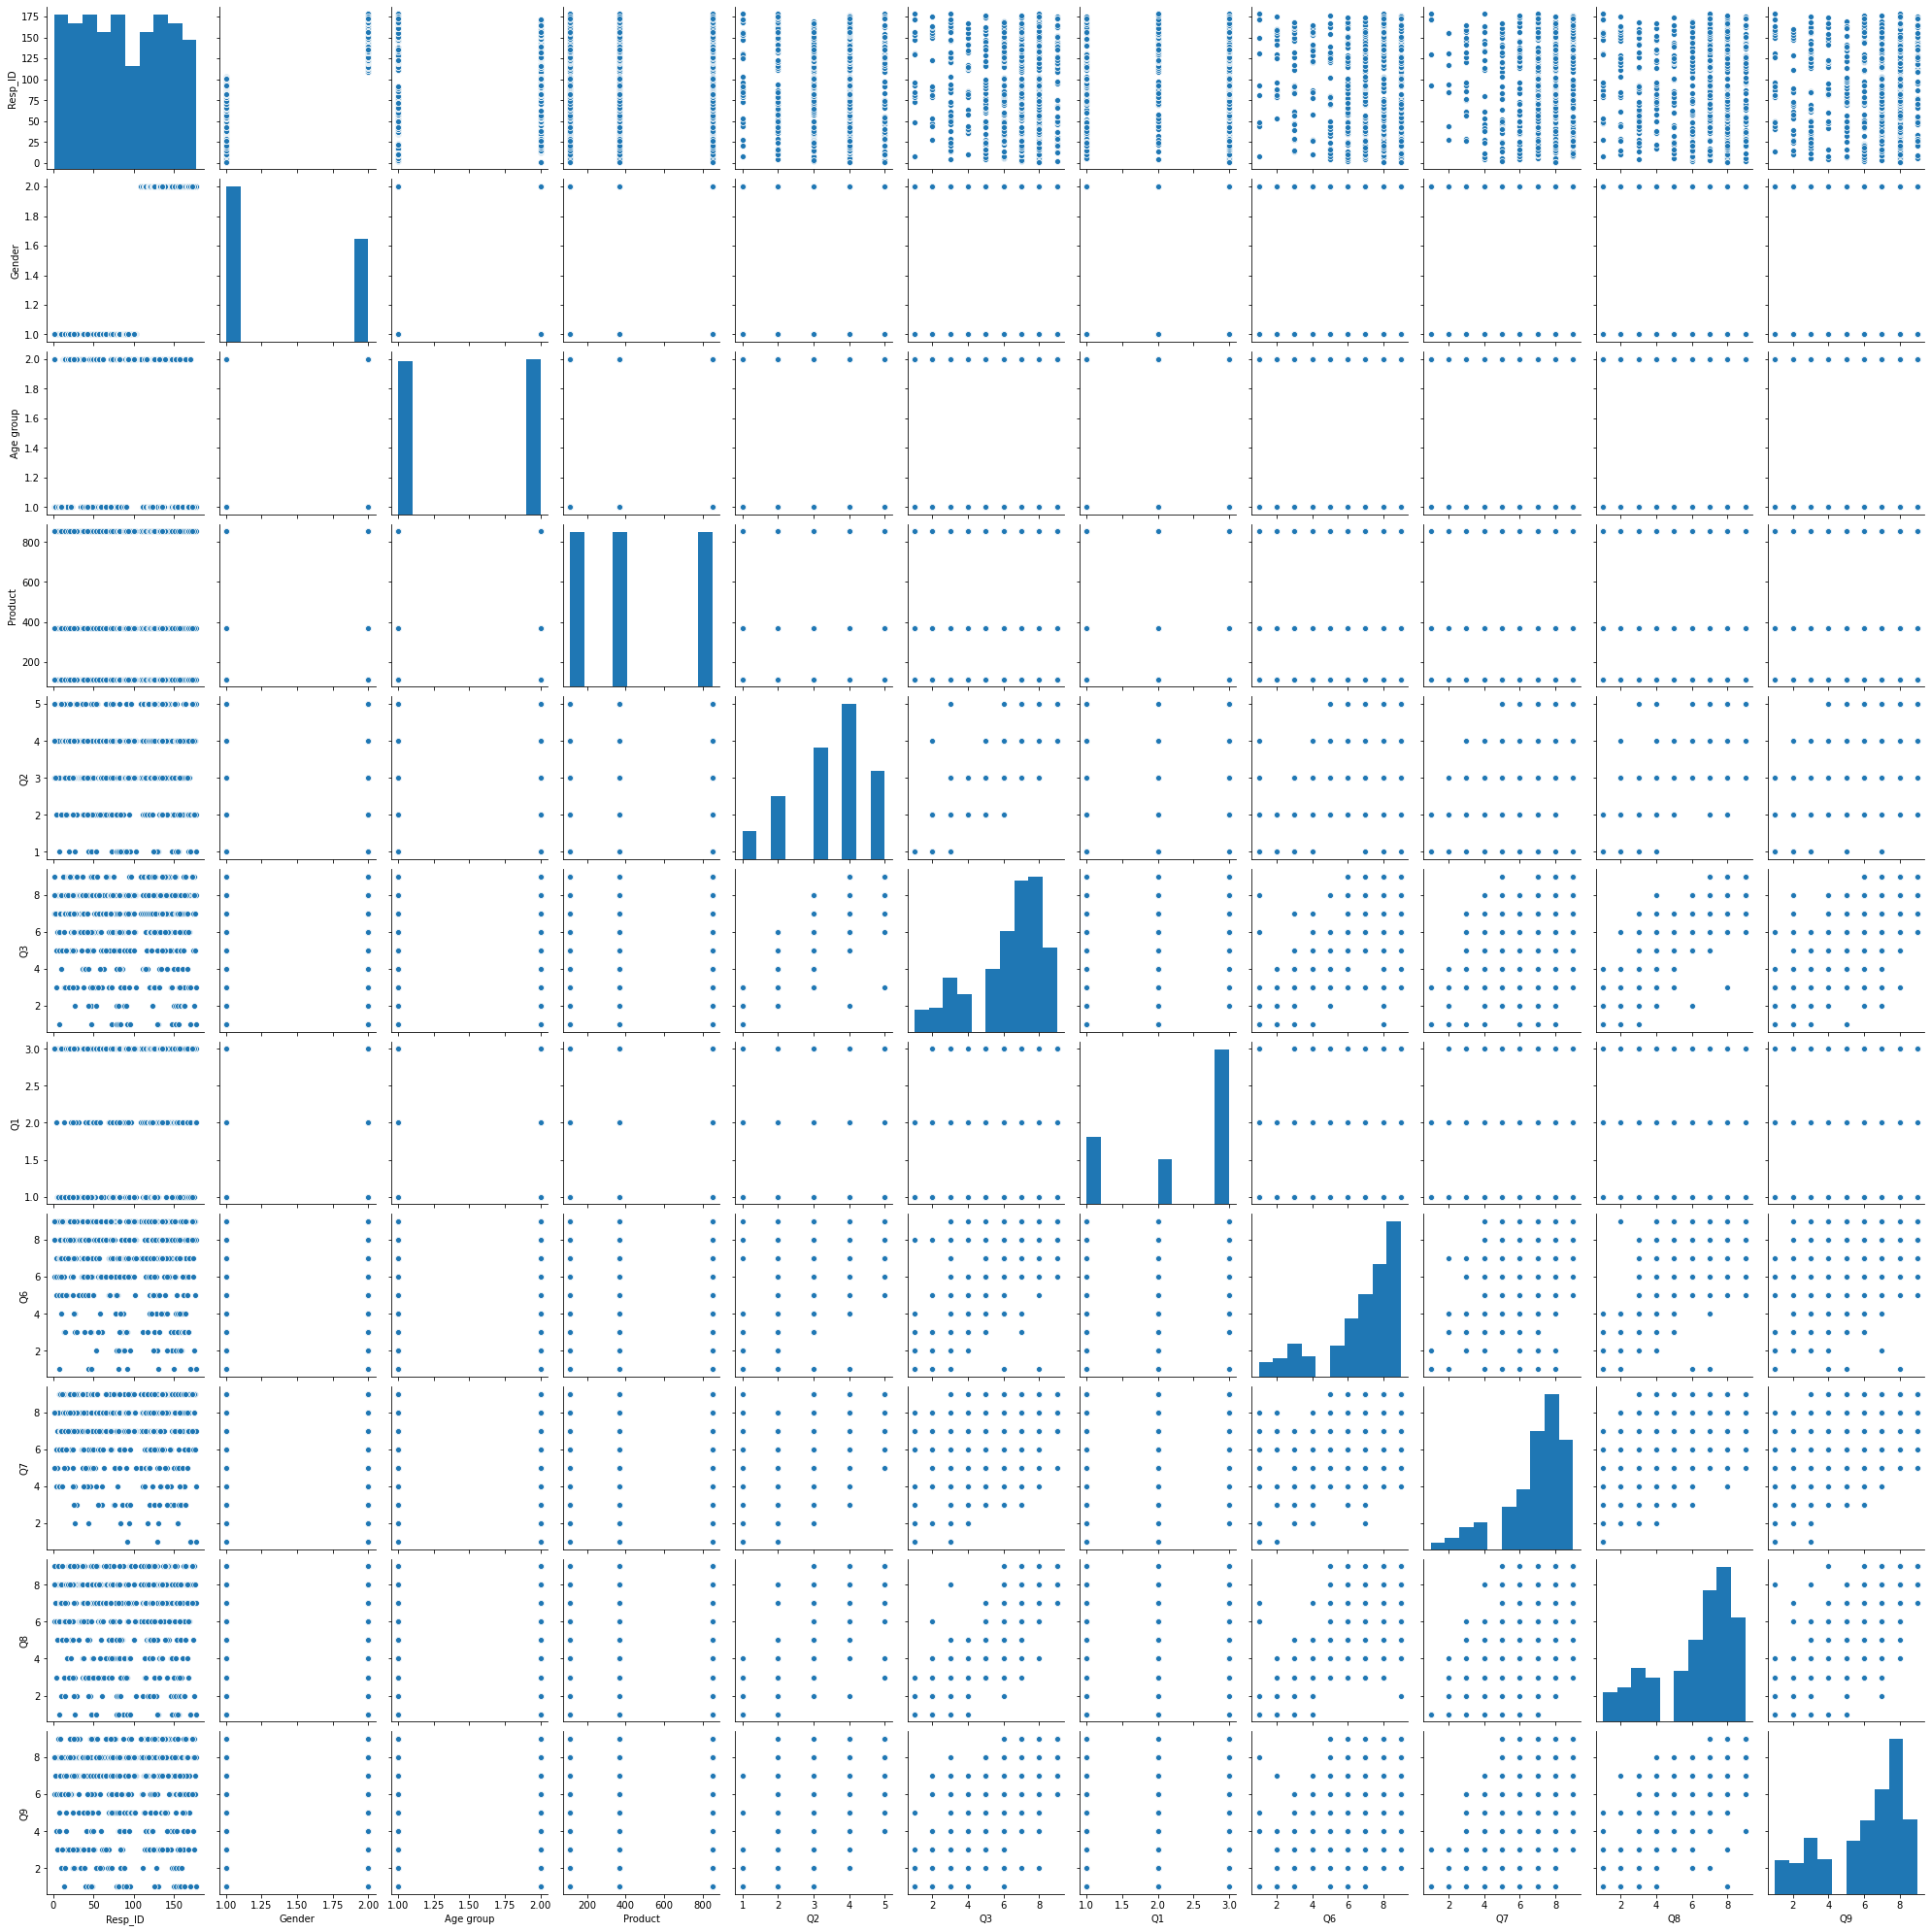

In [14]:
sns.pairplot(df)

In [15]:
corr_matrix = df.corr()
print(corr_matrix["Product"].sort_values(ascending=False))

Product      1.000000
Q1           0.088473
Q3           0.078965
Q8           0.078016
Q6           0.073454
Q9           0.070716
Q7           0.058263
Q2           0.027414
Age group    0.000000
Gender       0.000000
Resp_ID      0.000000
Name: Product, dtype: float64


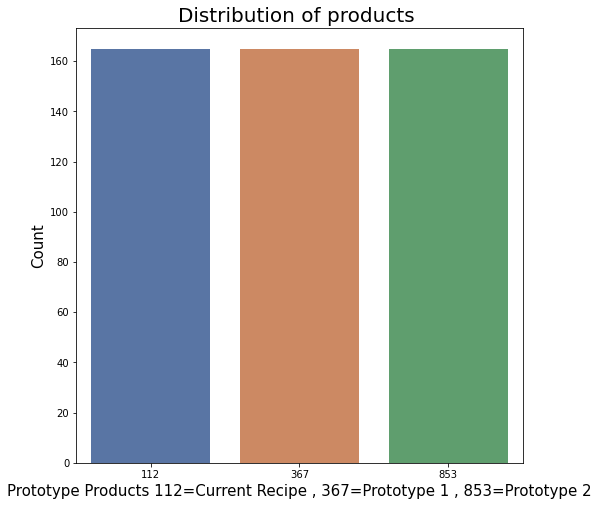

In [16]:
#Data distribution of the Target Variable before removing outliers:
plt.figure(figsize=(8,8))
sns.countplot(x = df.Product,palette='deep')
plt.xlabel('Prototype Products 112=Current Recipe , 367=Prototype 1 , 853=Prototype 2', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.title("Distribution of products ",fontsize= 20)
plt.show()

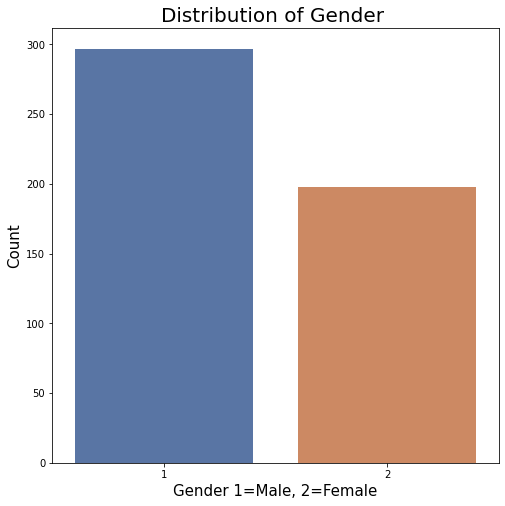

In [17]:
# Distribution of the gender
plt.figure(figsize=(8,8))
sns.countplot(x = df.Gender,palette='deep')
plt.xlabel('Gender 1=Male, 2=Female', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.title("Distribution of Gender ",fontsize= 20)
plt.show()

Male and female are in the proportion of 3:2

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5a5391070>,
      dtype=object)

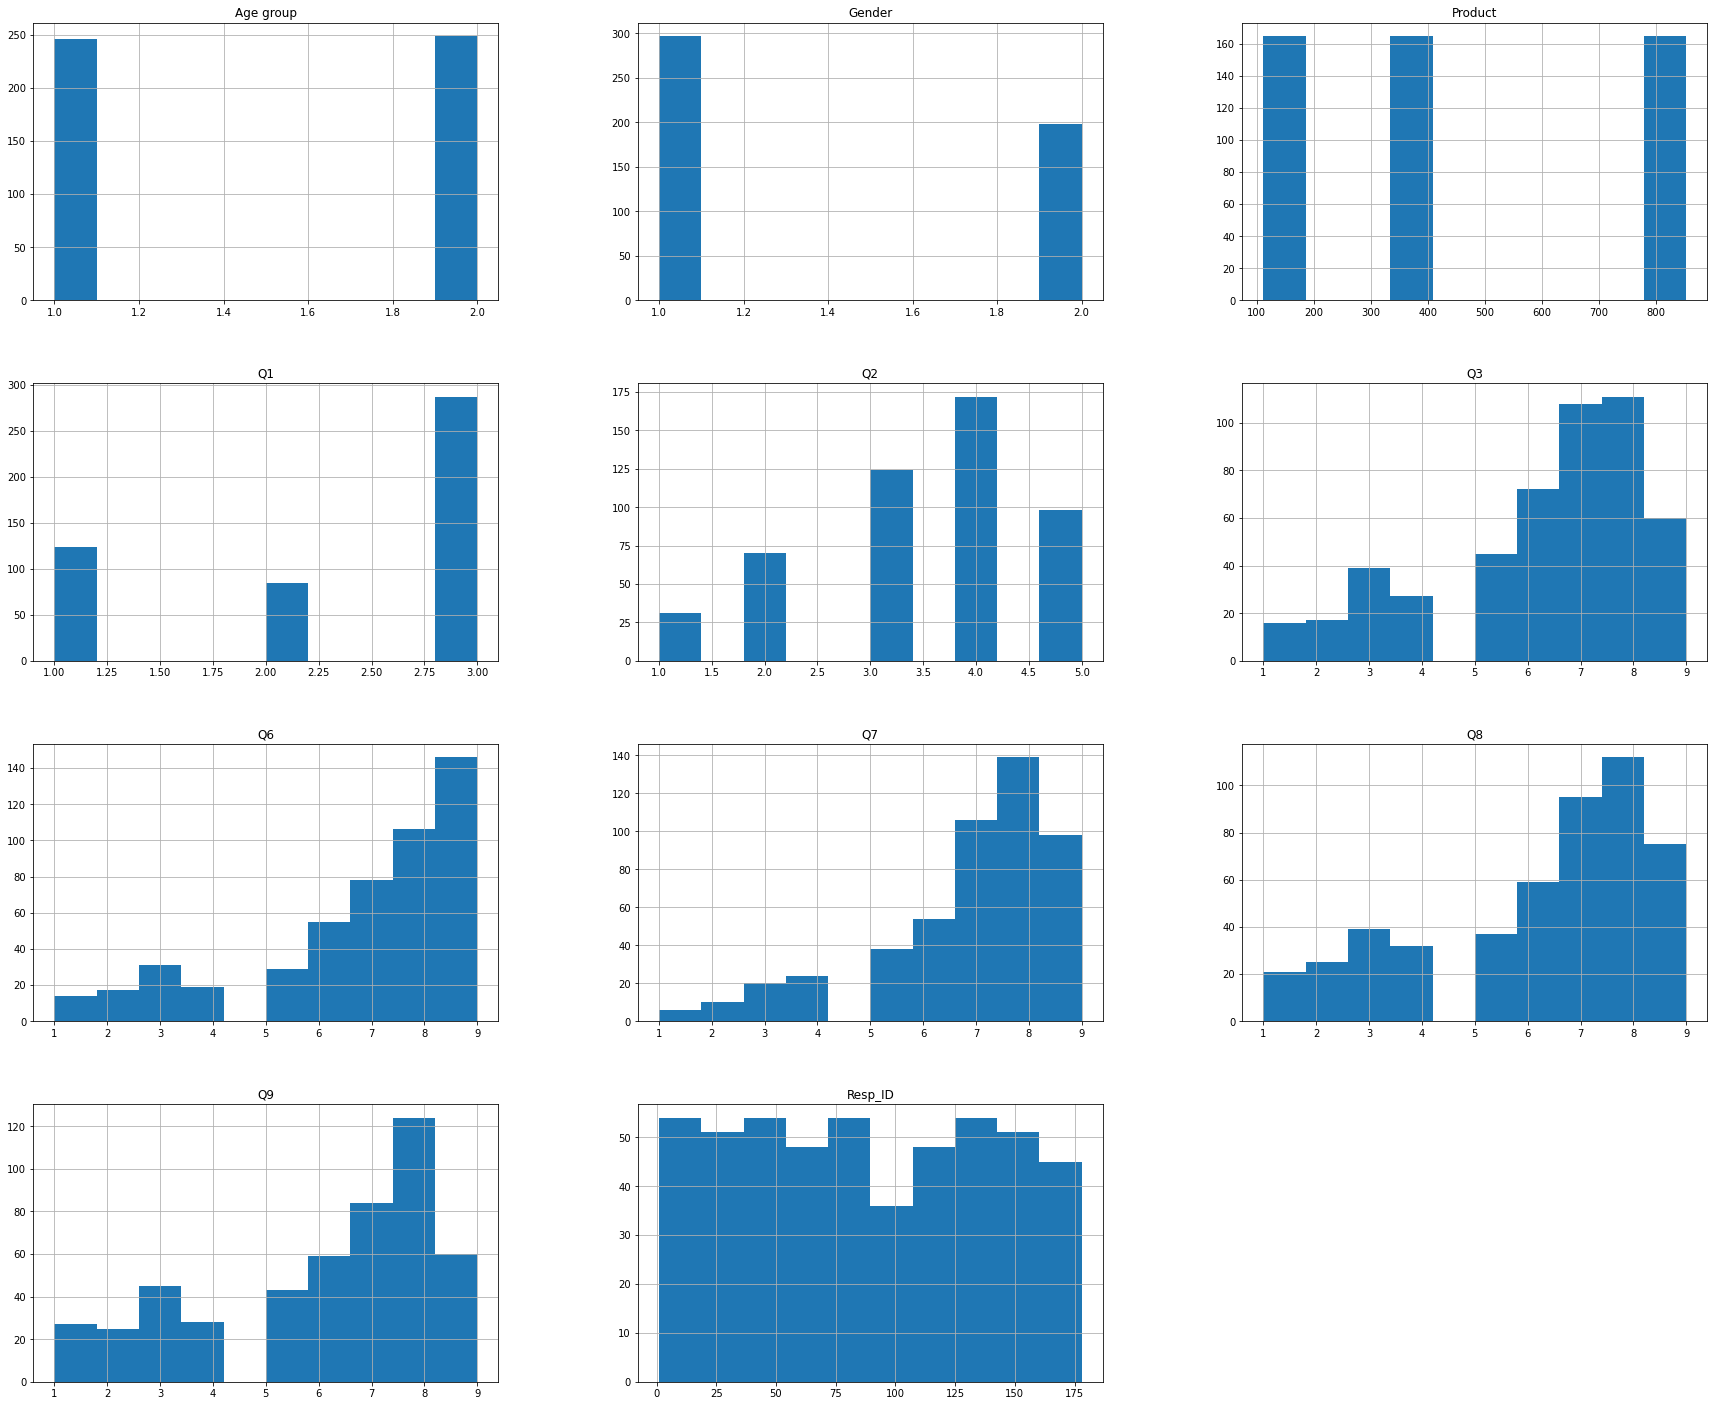

In [18]:
df.hist(figsize=(30,25))

Male and female are in the proportion of 3:2, Q6 the likabibility of the customer shows more likable. Age group and product have same counts.

In [19]:
#group wise dtypes:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['Resp_ID', 'Gender', 'Age group', 'Product', 'Q2', 'Q3', 'Q1', 'Q6',
        'Q7', 'Q8', 'Q9'],
       dtype='object'),
 dtype('O'): Index(['S8a'], dtype='object')}

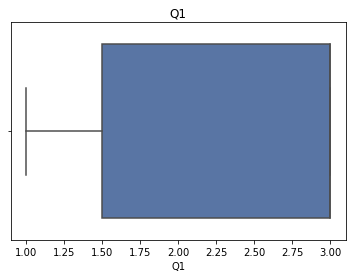

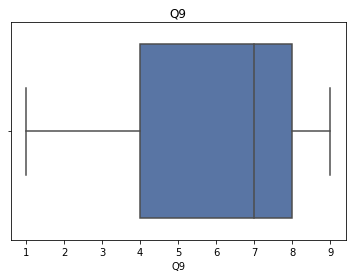

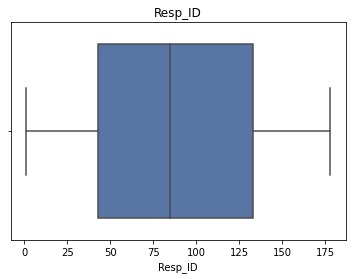

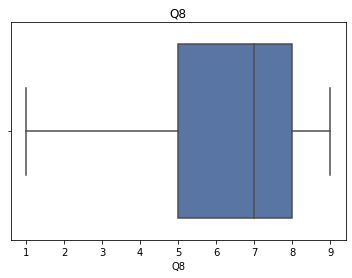

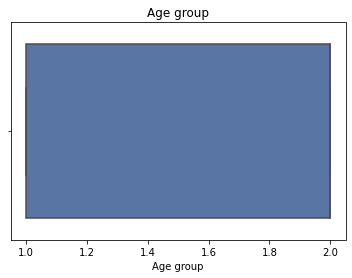

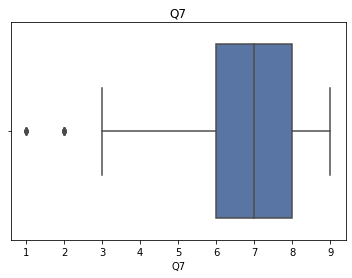

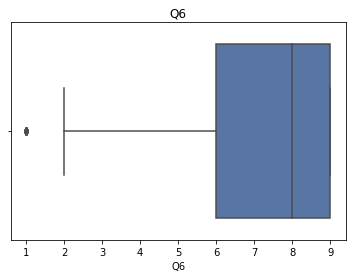

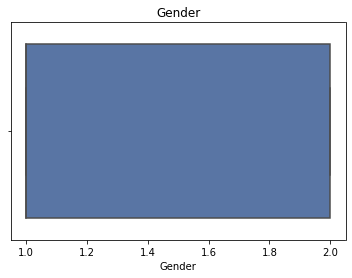

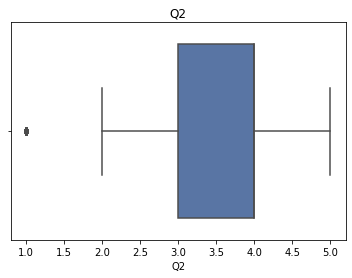

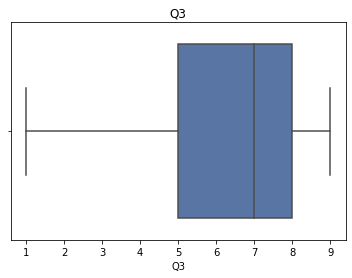

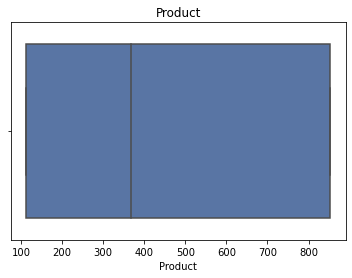

In [20]:
columns={'Resp_ID', 'Gender', 'Age group', 'Product', 'Q2', 'Q3', 'Q1', 'Q6',
        'Q7', 'Q8', 'Q9'}
for i in columns:
    plt.figure()
    plt.clf()
    sns.boxplot(df[i],palette="deep")
    plt.title(i)
    plt.show()

I see there are some outliers present in the Q2, Q6 , Q7

Removing Outliers from the data: The plot boxes situated below are representing the minimum value , maximum value and showing the mean value for the variables. In most of the variables. The graph shows some pointers above or below the graph which is used to detect if there are any outliers present in the datasets or not. If the detection is accurate then we should be able to treat them in order to get the perfect outcome or result.Outliers here are the observations that we find at the abnormal distance from other values.

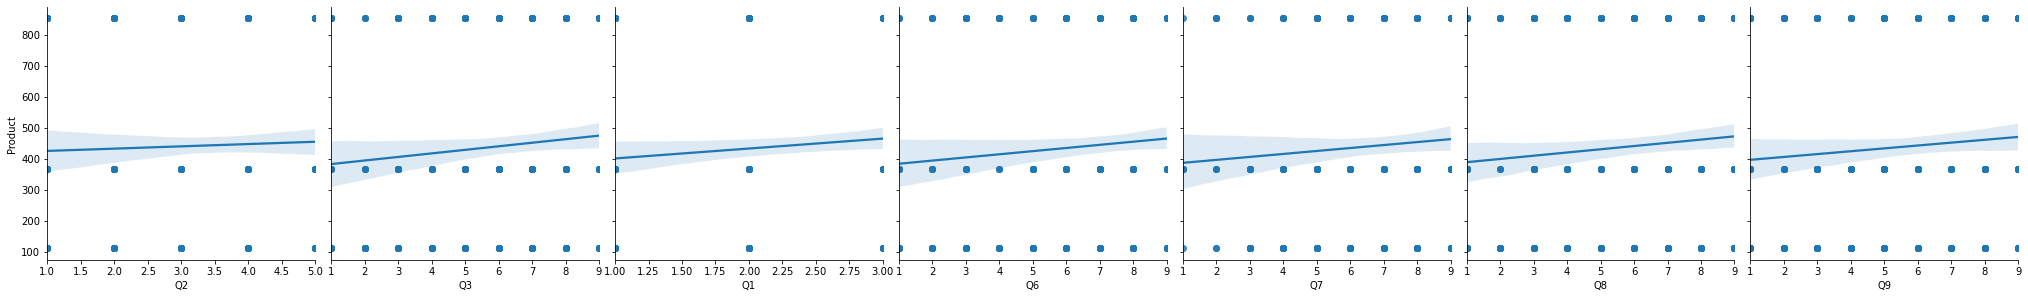

In [21]:
sns.pairplot(df, x_vars=['Q2', 'Q3', 'Q1', 'Q6','Q7', 'Q8', 'Q9'], y_vars='Product', size=4, aspect=1, kind='reg')

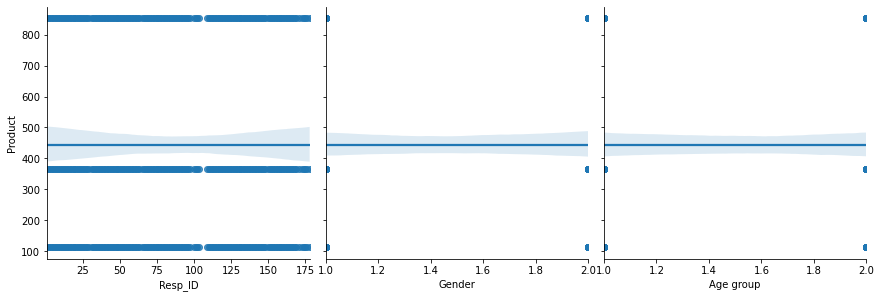

In [22]:
sns.pairplot(df, x_vars=['Resp_ID', 'Gender', 'Age group'], y_vars='Product', size=4, aspect=1, kind='reg')

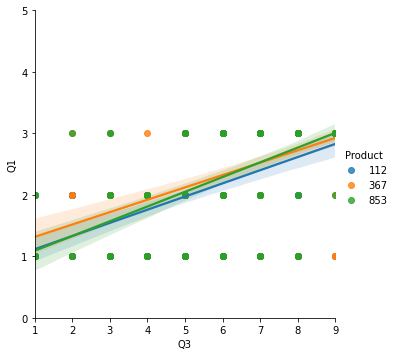

In [23]:
# Drinkability V/S Product Liking
var = 'Q3'
plot = sns.lmplot(var,'Q1',data=df,hue='Product')
plot.set(ylim = (0,5))

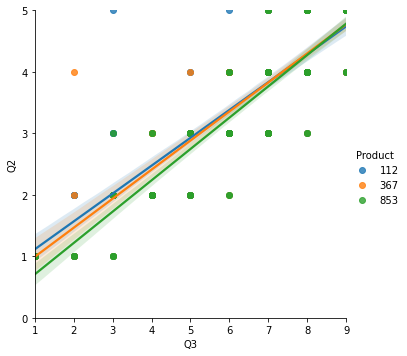

In [24]:
# Drinkability V/S Buying Intension
var = 'Q3'
plot = sns.lmplot(var,'Q2',data=df,hue='Product')
plot.set(ylim = (0,5))

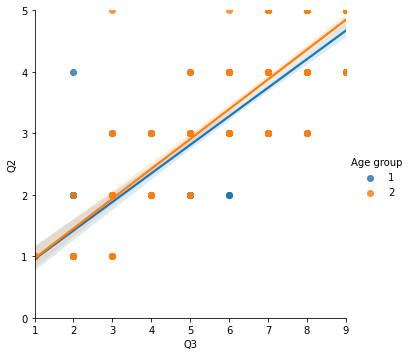

In [25]:
var = 'Q3'
plot = sns.lmplot(var,'Q2',data=df,hue='Age group')
plot.set(ylim = (0,5))

In [26]:
def dis_bar(x,y):
    
    df.groupby([x,y]).size().unstack(level=-1).plot(kind='bar', figsize=(35,10))
    plt.xlabel(x,fontsize= 25)
    plt.ylabel('count',fontsize= 25)
    plt.legend(loc=0,fontsize= 25)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.title("{X} Vs {Y}".format(X=x,Y=y),fontsize = 50)
    plt.show()

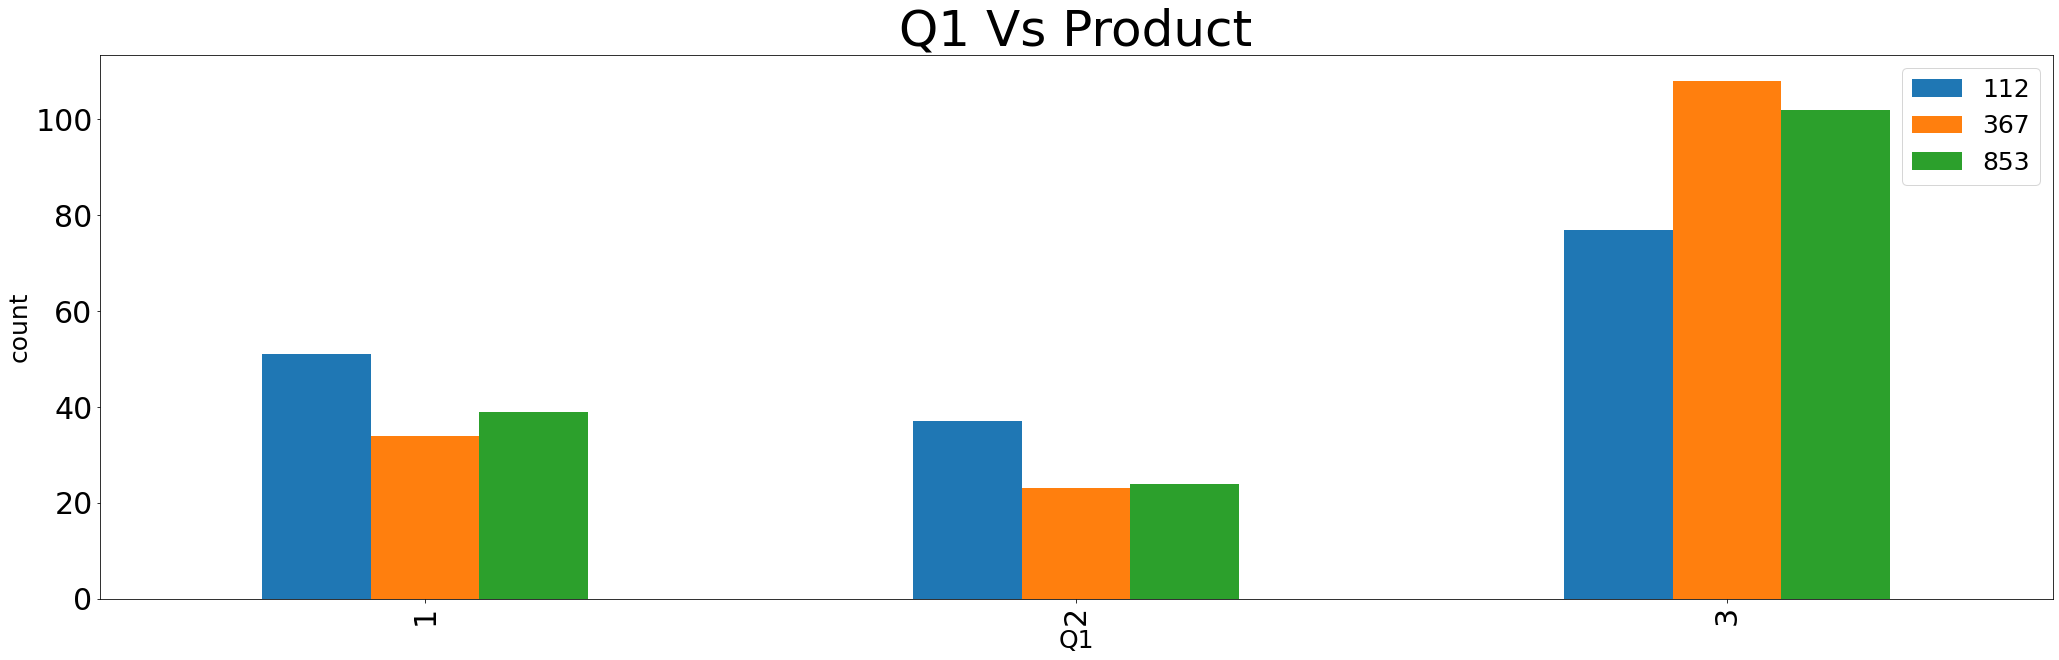

In [27]:
dis_bar('Q1','Product')

Most of our customer would like to keep drinking Prototype 2 Beer where as We could see that current recipe customers would like to switch the product. 

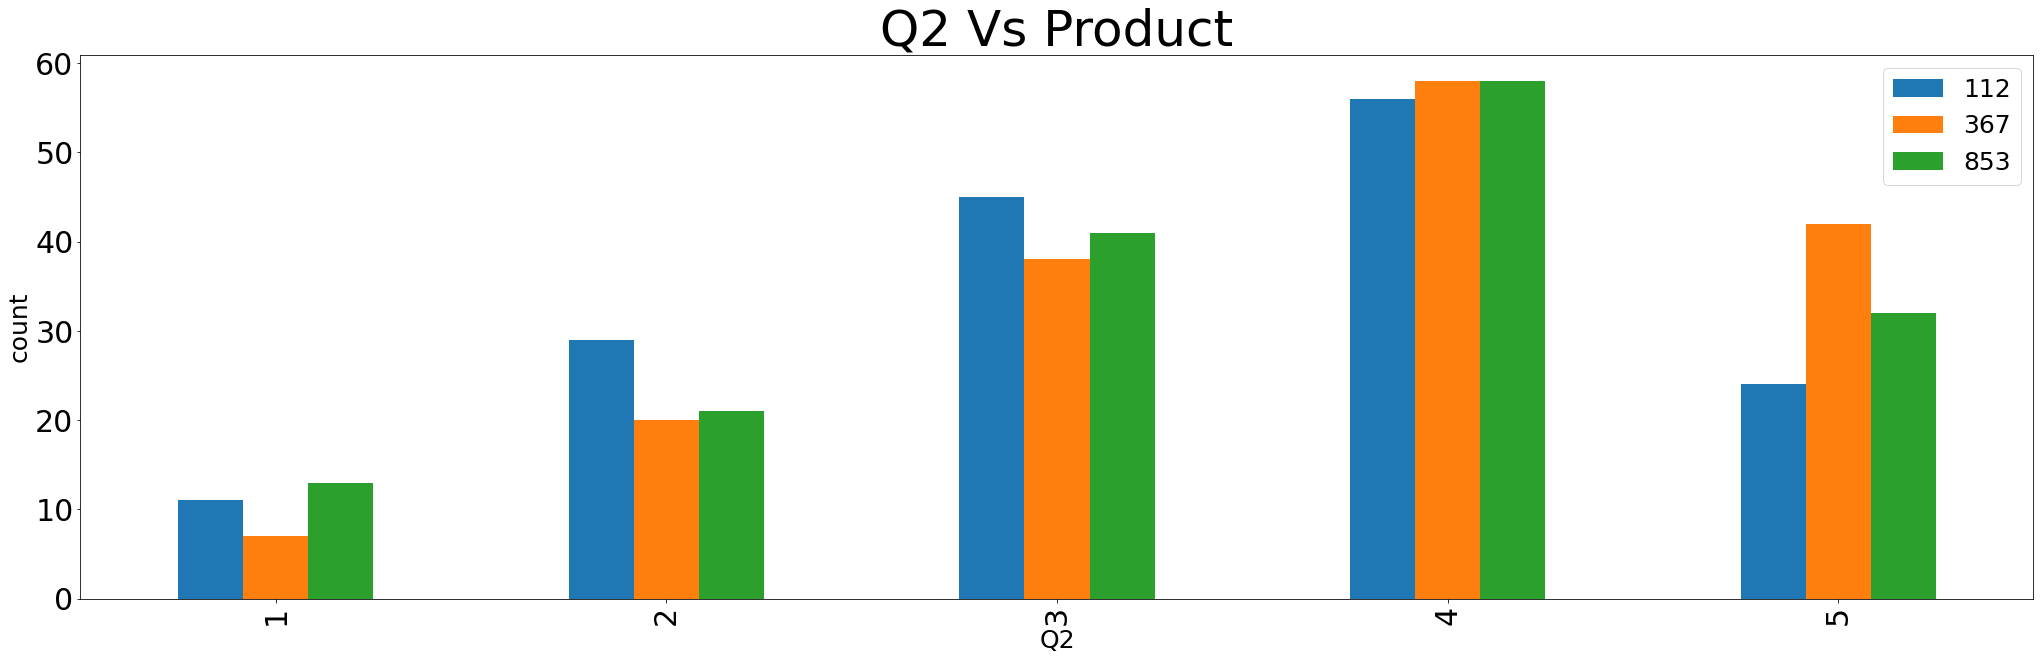

In [28]:
dis_bar('Q2','Product')

This Graph helps in understanding if the beer available at the store or bar, Prototype 2 lovers did not had the difficlty in buyint the product.

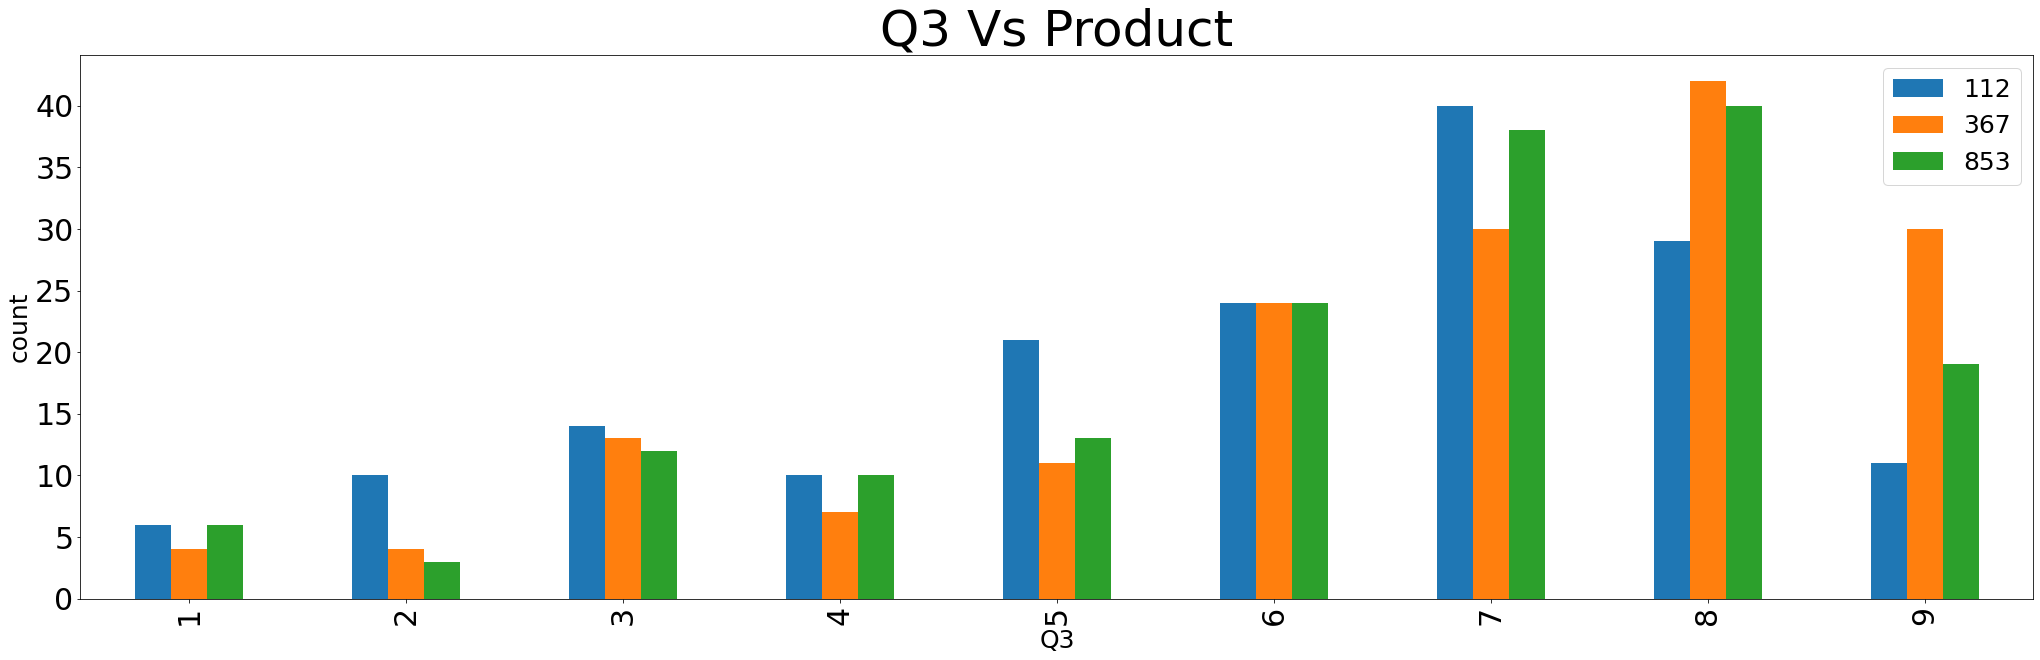

In [29]:
dis_bar('Q3','Product')

With the help of above graph the over all liking of the product is tends towords Prototype 2.

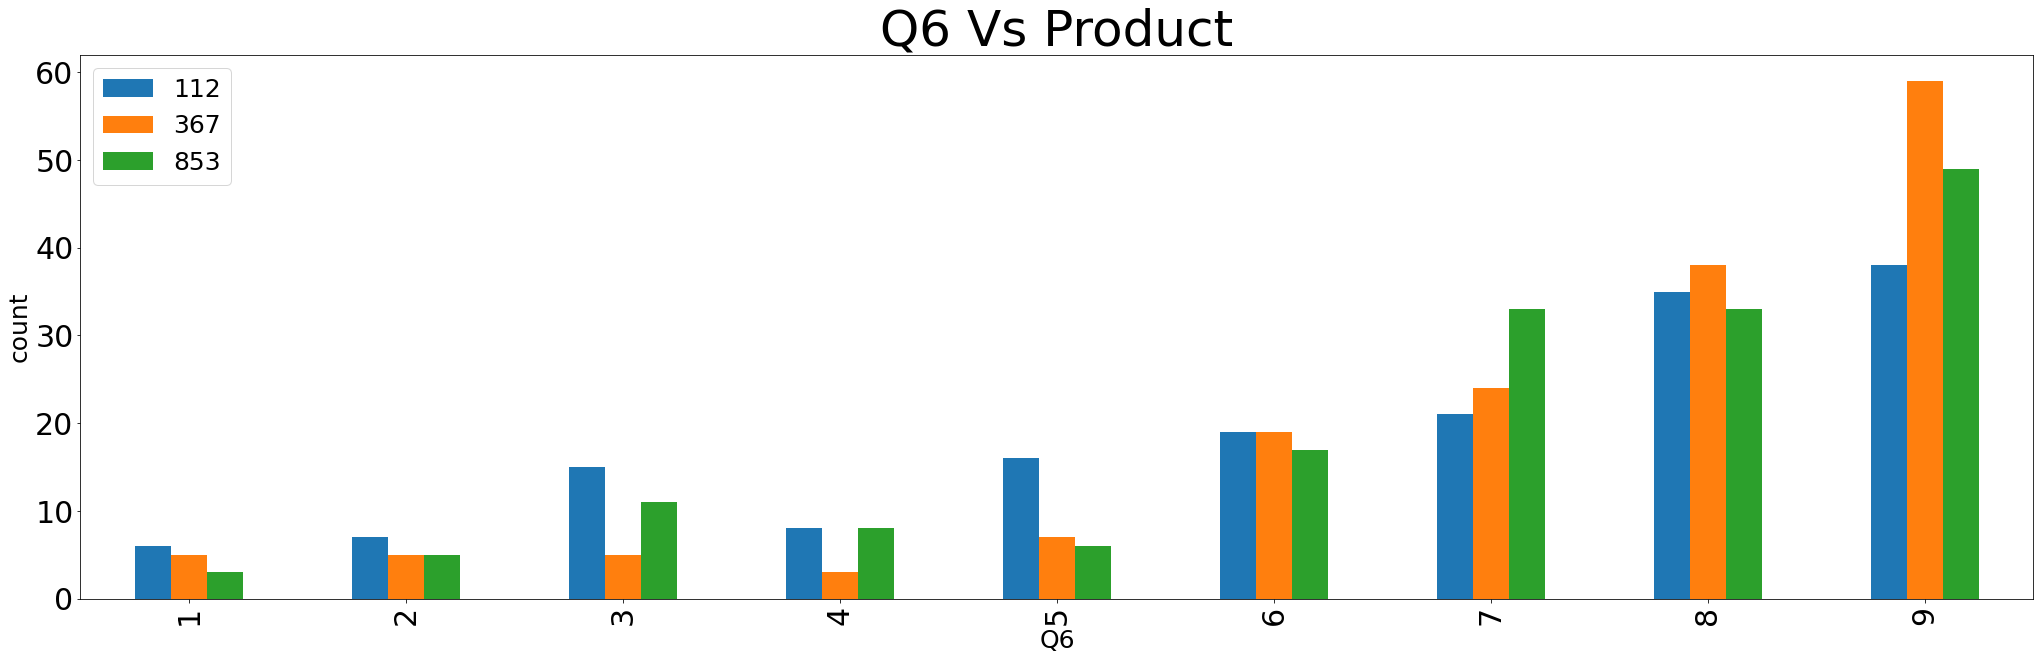

In [30]:
dis_bar('Q6','Product')

We differ the above product on the ease of the drinking, I could see that mostly people have liked Prototype 2 and accompanied by Prototype 1.

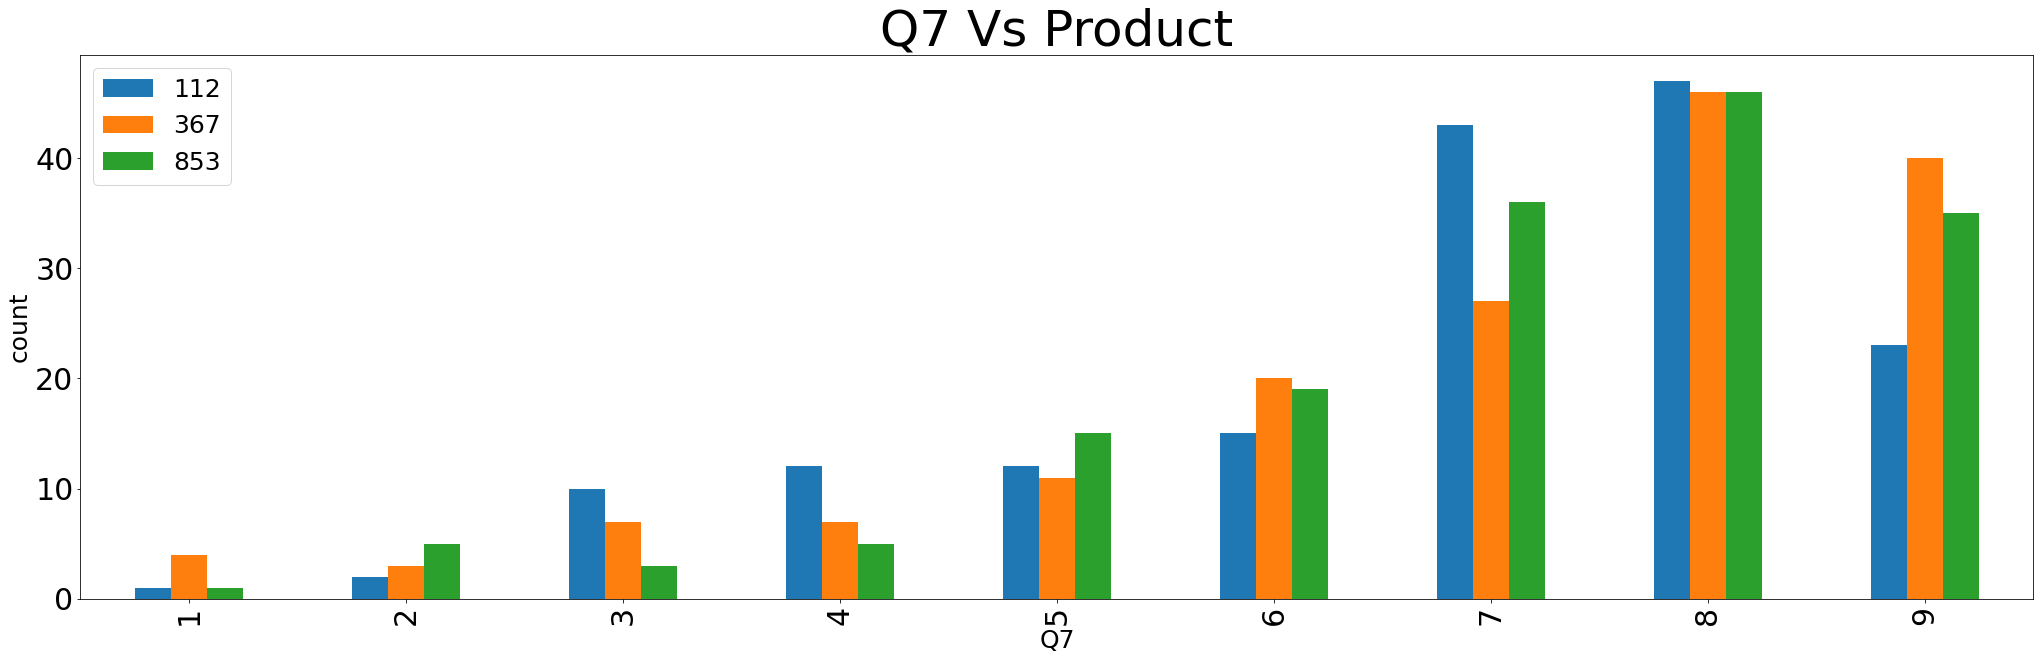

In [31]:
dis_bar('Q7','Product')

The Beer needs to be refreshing but with the above products , I could see that 112 that is Current Recipe other products have gained more points of refreshment.

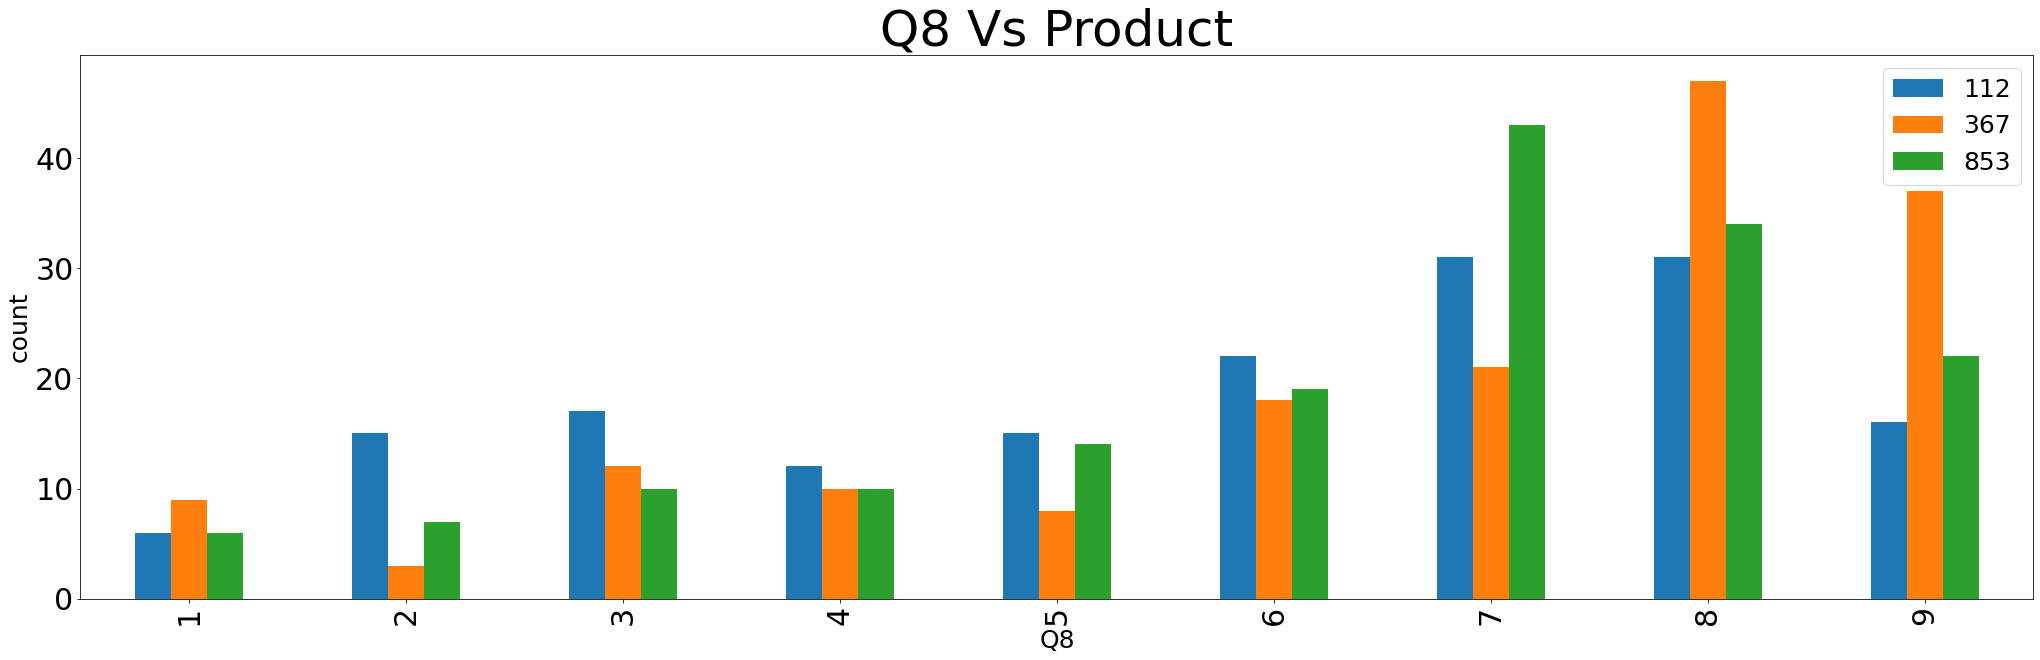

In [32]:
dis_bar('Q8','Product')

This shows that how much the customer liked or disliked the taste of the Beer where Prototype 2 shows the most taste liking.

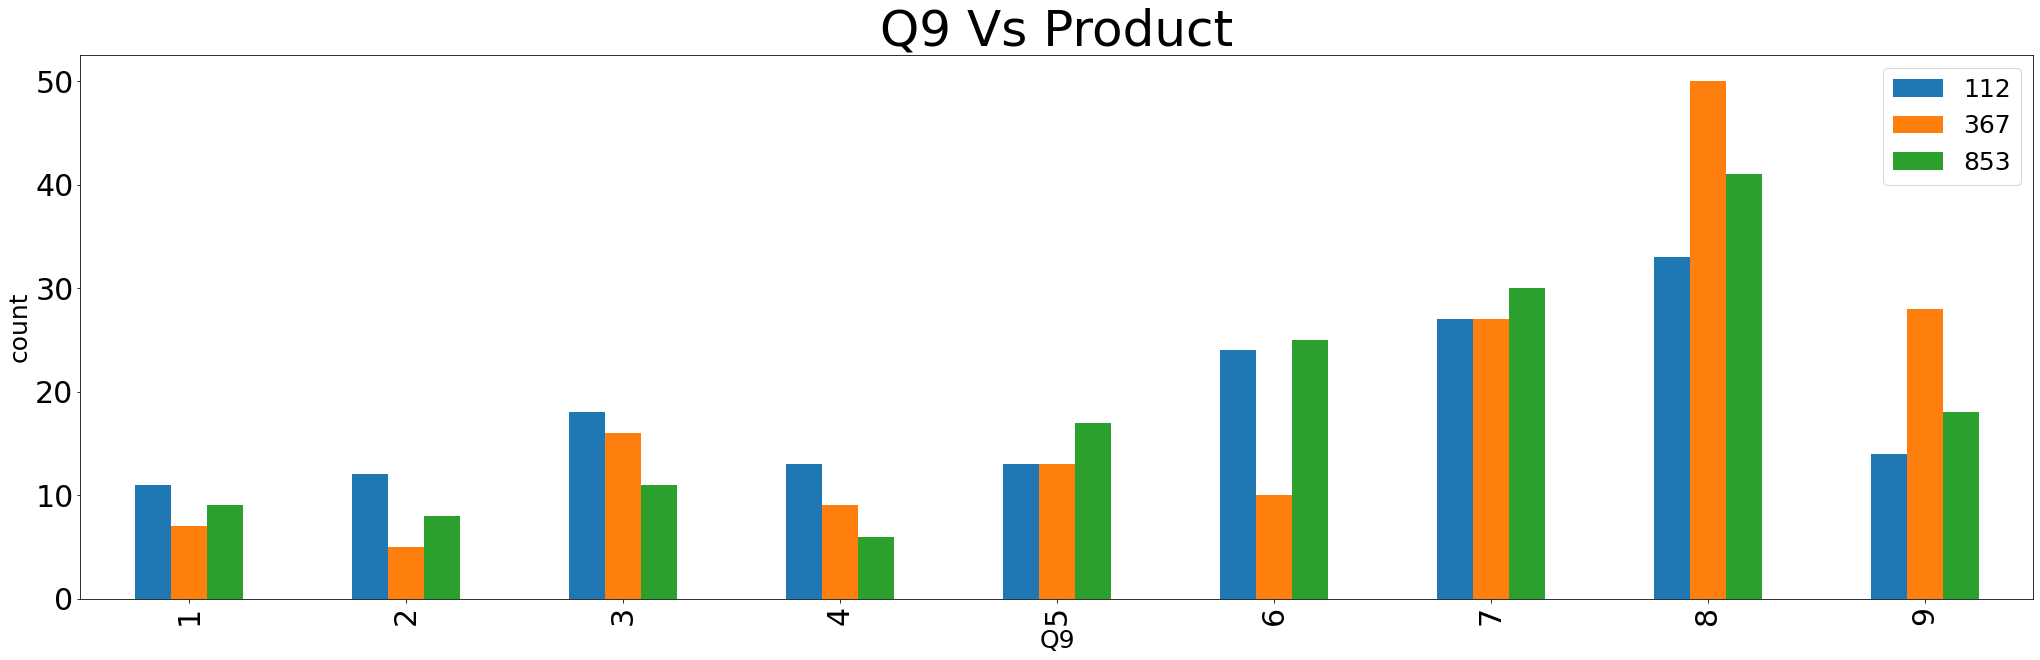

In [33]:
dis_bar('Q9','Product')

The above graph shows that how much the customers like or dislike the aftertaste of this beer for all the three products where we could see that prototype 2 is liked and disliked the most.

In [34]:
# to change use .astype() 
df['Product'] = df.Product.astype(object)

In [35]:
#converting the object dtype columns and giving then numerical values with the help of Label encoder:
from sklearn.preprocessing import LabelEncoder

categorical_features = list(df.select_dtypes(include=['object']).columns)
label_encoder_feat = {}
for i, feature in enumerate(categorical_features):
    label_encoder_feat[feature] = LabelEncoder()
    df[feature] = label_encoder_feat[feature].fit_transform(df[feature])

df.head()

,Resp_ID,Gender,Age group,Product,S8a,Q2,Q3,Q1,Q6,Q7,Q8,Q9
0,5,1,1,0,95,4,8,1,9,7,6,8
1,5,1,1,1,95,3,6,1,6,5,5,3
2,5,1,1,2,95,3,6,1,6,5,7,6
3,2,1,1,0,36,3,7,3,6,5,6,6
4,2,1,1,1,36,4,9,3,9,8,9,8


#### Removing Outliers:

Removing the outliers from the data by using Z_SCORE

In [36]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)

(495, 12)


In [37]:
df1=df.loc[(z_score<3).all(axis=1)]
print(df1.shape)

(489, 12)


After removing the outliers from the data the shape of the data has change from 495, 12 to 489, 12 which shows that with the z score we are able to remove 6 rows , Hence our new data shape is (489, 12)

#### Checking for Skewness:

In [38]:
df1.skew()

Resp_ID      0.045860
Gender       0.432263
Age group    0.004103
Product      0.000000
S8a          0.129222
Q2          -0.464420
Q3          -0.803101
Q1          -0.710598
Q6          -1.047318
Q7          -0.985647
Q8          -0.744381
Q9          -0.706329
dtype: float64

In [39]:
#Treatment for the skewed data:
for col in df1.columns:
    if df1.skew().loc[col]>0.55:
        df1[col]=np.log1p(df1[col])

In [40]:
df1.skew()

Resp_ID      0.045860
Gender       0.432263
Age group    0.004103
Product      0.000000
S8a          0.129222
Q2          -0.464420
Q3          -0.803101
Q1          -0.710598
Q6          -1.047318
Q7          -0.985647
Q8          -0.744381
Q9          -0.706329
dtype: float64

#### Removing columns 

In [41]:
df1.drop("Resp_ID", axis=1,inplace=True)

In [42]:
df1.drop("Gender", axis=1,inplace=True)

In [43]:
df1.drop("Age group", axis=1,inplace=True)

In [44]:
df1.head()

,Product,S8a,Q2,Q3,Q1,Q6,Q7,Q8,Q9
0,0,95,4,8,1,9,7,6,8
1,1,95,3,6,1,6,5,5,3
2,2,95,3,6,1,6,5,7,6
3,0,36,3,7,3,6,5,6,6
4,1,36,4,9,3,9,8,9,8


In [45]:
df1.columns

Index(['Product', 'S8a', 'Q2', 'Q3', 'Q1', 'Q6', 'Q7', 'Q8', 'Q9'], dtype='object')

Bringing the Product column to the first in order to ease our processing.

In [46]:
mid = df1['Product']
df1.drop(labels=['Product'], axis=1, inplace = True)
df1.insert(0, 'Product', mid)
df1.head()

,Product,S8a,Q2,Q3,Q1,Q6,Q7,Q8,Q9
0,0,95,4,8,1,9,7,6,8
1,1,95,3,6,1,6,5,5,3
2,2,95,3,6,1,6,5,7,6
3,0,36,3,7,3,6,5,6,6
4,1,36,4,9,3,9,8,9,8


#### Assigning X AND Y Variables:

In [47]:
x=df1.iloc[:,1:12]
x.shape
x

,S8a,Q2,Q3,Q1,Q6,Q7,Q8,Q9
0,95,4,8,1,9,7,6,8
1,95,3,6,1,6,5,5,3
2,95,3,6,1,6,5,7,6
3,36,3,7,3,6,5,6,6
4,36,4,9,3,9,8,9,8
...,...,...,...,...,...,...,...,...
490,38,3,6,3,8,8,8,7
491,38,3,8,3,9,8,6,5
492,7,4,7,1,9,7,8,8
493,7,3,6,1,6,7,5,7


In [48]:
y=df1.iloc[:,0:1]
y.shape
y.head()

,Product
0,0
1,1
2,2
3,0
4,1


In [49]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(copy=True, with_mean=True, with_std=True).fit(x)
df1_scaler = scaler.transform(x)
x = pd.DataFrame(df1_scaler)
x.columns = ['S8a', 'Q2', 'Q3', 'Q1',
       'Q6', 'Q7', 'Q8', 'Q9']
x.head(10)

,S8a,Q2,Q3,Q1,Q6,Q7,Q8,Q9
0,0.675206,0.442665,0.797369,-1.579547,0.960947,-0.003476,-0.137609,0.802740
1,0.675206,-0.448130,-0.170158,-1.579547,-0.437574,-1.136756,-0.583242,-1.361207
2,0.675206,-0.448130,-0.170158,-1.579547,-0.437574,-1.136756,0.308025,-0.062839
3,-0.673850,-0.448130,0.313605,0.778922,-0.437574,-1.136756,-0.137609,-0.062839
4,-0.673850,0.442665,1.281132,0.778922,0.960947,0.563164,1.199291,0.802740
5,-0.673850,0.442665,0.313605,0.778922,0.960947,0.563164,0.753658,0.802740
6,0.217899,-1.338924,-1.621449,-0.400313,-0.903748,-1.703396,-1.474508,-0.928417
7,0.217899,-0.448130,-0.653922,-0.400313,-0.437574,-0.570116,0.308025,0.802740
8,0.217899,0.442665,0.313605,0.778922,0.028600,-0.570116,-0.137609,-0.062839
9,-0.811042,0.442665,0.797369,0.778922,0.494773,0.563164,0.753658,1.235530


#### MODEL Testing And SELECTION

Using different types of model in oder to acquire optimum solution:

In [50]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30,random_state=52,stratify=y)

In [51]:
print(x_train.shape,x_test.shape)

(342, 8) (147, 8)


In [52]:
print(y_train.shape,y_test.shape)

(342, 1) (147, 1)


In [53]:
from math import log
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [54]:
estimator = RandomForestRegressor()
param_grid = { 
            "n_estimators"      : [10,20,30,50],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

grid.fit(x_train, y_train)

grid.best_params_

{'bootstrap': True,
 'max_features': 'sqrt',
 'min_samples_split': 8,
 'n_estimators': 50}

In [55]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30,random_state=65)
rfr=RandomForestRegressor(bootstrap=True,max_features='log2',min_samples_split=2,n_estimators=50)
rfr.fit(x_train, y_train)
rfr.score(x_train,y_train)
predrfr=rfr.predict(x_test)

In [56]:
rfr.score(x_train,y_train)

0.8285352163390337

In [57]:
from math import sqrt
print("Test Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mean_squared_error(y_test,predrfr)))
print("R-squared: ", r2_score(y_test,predrfr))

Test Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  0.913192549604442
R-squared:  -0.26386526518445774


In [58]:
rfc=RandomForestClassifier(random_state=52)
param_grid = { 
    'n_estimators': [10, 20 , 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,6,8,10]
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3)
CV_rfc.fit(x_train, y_train)
CV_rfc.best_params_

{'max_depth': 2, 'max_features': 'auto', 'n_estimators': 100}

In [59]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
R_forest= RandomForestClassifier(n_estimators=100, max_features= 'auto',max_depth=2)
modelR= R_forest.fit(x_train, y_train)

# Predictions
pred_2 = modelR.predict(x_test)

print ("The accuracy of RandomForestClassifier : ",accuracy_score(y_test, pred_2))
print ("The f1 score of RandomForestClassifier : ", f1_score(y_test, pred_2, average = 'weighted'))

print(confusion_matrix(y_test,pred_2))
print(classification_report(y_test,pred_2))

The accuracy of RandomForestClassifier :  0.3469387755102041
The f1 score of RandomForestClassifier :  0.3424252894196551
[[22 14 13]
 [16 18 16]
 [22 15 11]]
              precision    recall  f1-score   support

           0       0.37      0.45      0.40        49
           1       0.38      0.36      0.37        50
           2       0.28      0.23      0.25        48

    accuracy                           0.35       147
   macro avg       0.34      0.35      0.34       147
weighted avg       0.34      0.35      0.34       147



In [60]:
from sklearn.ensemble import GradientBoostingClassifier
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25)
model = GradientBoostingClassifier()
parameters = {'learning_rate': [0.001,0.01,0.1,0.02,0.03,1],
              'max_depth'    : [4,6,8]}
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 3, n_jobs=-1)
grid.fit(x_train, y_train)
grid.best_params_

{'learning_rate': 0.001, 'max_depth': 4}

In [61]:
GBR= GradientBoostingClassifier(learning_rate=0.001, max_depth=4)
GBR.fit(x_train,y_train)
GBR.score(x_test,y_test)

0.36585365853658536

In [62]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf',class_weight="balanced")
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.3902439024390244
[[21  5 12]
 [11 15 13]
 [20 14 12]]
              precision    recall  f1-score   support

           0       0.40      0.55      0.47        38
           1       0.44      0.38      0.41        39
           2       0.32      0.26      0.29        46

    accuracy                           0.39       123
   macro avg       0.39      0.40      0.39       123
weighted avg       0.39      0.39      0.38       123



In [63]:
from sklearn.model_selection import KFold
from sklearn import tree
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=10)
for depth in range (1,15):
    tree_classifier=tree.DecisionTreeClassifier(max_depth=depth,random_state=10)
    if tree_classifier.fit(x,y).tree_.max_depth<depth:
        break
    score=np.mean(cross_val_score(tree_classifier,x,y,scoring='accuracy', cv=crossvalidation,n_jobs=1))
    print(depth, score)

1 0.40102040816326523
2 0.4173894557823129
3 0.39906462585034014
4 0.41118197278911567
5 0.37419217687074824
6 0.34953231292517006
7 0.33924319727891156
8 0.34549319727891153
9 0.310671768707483
10 0.3434098639455782
11 0.3147108843537415
12 0.30871598639455783
13 0.31075680272108847
14 0.30858843537414965


In [64]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
search_grid={'n_estimators':[10,50,100,200],'learning_rate':[0.01,0.1,1]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='accuracy',n_jobs=1,cv=crossvalidation)
search.fit(x,y)
search.best_params_

{'learning_rate': 0.01, 'n_estimators': 200}

In [65]:
score=np.mean(cross_val_score(ada,x,y,scoring='accuracy',cv=crossvalidation,n_jobs=1))
score

0.3576955782312926

In [66]:
search.best_score_

0.41318027210884356

In [67]:
# base estimator = Decision tree Classifier
from sklearn.ensemble import AdaBoostClassifier
ADA=AdaBoostClassifier(n_estimators=200 , learning_rate=.01)
ADA.fit(x_train,y_train)
ADA.score(x_train,y_train)
predADA=ADA.predict(x_test)
print(accuracy_score(y_test,predADA))
print(confusion_matrix(y_test,predADA))
print(classification_report(y_test,predADA))

0.3902439024390244
[[18  7 13]
 [11 18 10]
 [20 14 12]]
              precision    recall  f1-score   support

           0       0.37      0.47      0.41        38
           1       0.46      0.46      0.46        39
           2       0.34      0.26      0.30        46

    accuracy                           0.39       123
   macro avg       0.39      0.40      0.39       123
weighted avg       0.39      0.39      0.38       123



In [68]:
from sklearn.tree import DecisionTreeRegressor
depth =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [69]:
print(tree.best_estimator_)
tree.best_params_

DecisionTreeRegressor(max_depth=3)


{'max_depth': 3}

In [70]:
y_train_pred =tree.predict(x_train)
y_test_pred =tree.predict(x_test)

In [71]:
print("Train Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mean_squared_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  0.7781237921309588
R-squared:  0.09113370421361966


In [72]:
print("Test Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mean_squared_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  0.8745392192368914
R-squared:  -0.12689368142617274


In [74]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
isreh=Ridge()
parameters={'alpha':[10, 20, 50,80, 100]}
grid=GridSearchCV(isreh,parameters,cv=10)
grid.fit(x,y)
grid.best_params_

{'alpha': 100}

In [78]:
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=r_state)
    ridge=Ridge(alpha=100)
    ridge.fit(x_train,y_train)
    y_pred=ridge.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state,"is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2_score correspondint to: ",final_r_state,"is ",max_r_score)

r2_score corresponding to random state:  42 is:  0.014425320612397874
r2_score corresponding to random state:  43 is:  -0.03928341821721548
r2_score corresponding to random state:  44 is:  -0.024436512147204548
r2_score corresponding to random state:  45 is:  0.026897846989438978
r2_score corresponding to random state:  46 is:  0.007629295003662495
r2_score corresponding to random state:  47 is:  -0.04931433393569007
r2_score corresponding to random state:  48 is:  -1.7911965037198385e-05
r2_score corresponding to random state:  49 is:  0.008113519740388542
r2_score corresponding to random state:  50 is:  0.03092981002462014
r2_score corresponding to random state:  51 is:  0.01314204979878375
r2_score corresponding to random state:  52 is:  -0.01364160667579517
r2_score corresponding to random state:  53 is:  -0.03266918139726238
r2_score corresponding to random state:  54 is:  0.018903640505689046
r2_score corresponding to random state:  55 is:  0.02305670508871971
r2_score correspond

In [76]:
from sklearn.linear_model import Lasso
isreh=Lasso()
parameters={"alpha":[0.001,0.01,0.02, 0.024,0.1,1]}
grid=GridSearchCV(isreh,parameters,cv=10)
grid.fit(x,y)
grid.best_params_

{'alpha': 0.01}

In [77]:
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=r_state)
    lasso=Lasso(alpha=0.01)
    lasso.fit(x_train,y_train)
    y_pred=lasso.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state,"is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2_score correspondint to: ",final_r_state,"is ",max_r_score)

r2_score corresponding to random state:  42 is:  0.006579047532421112
r2_score corresponding to random state:  43 is:  -0.04337983724457262
r2_score corresponding to random state:  44 is:  -0.029624581025962327
r2_score corresponding to random state:  45 is:  0.027495711664706324
r2_score corresponding to random state:  46 is:  0.010872191672883558
r2_score corresponding to random state:  47 is:  -0.043753241295898526
r2_score corresponding to random state:  48 is:  -0.004854030288659494
r2_score corresponding to random state:  49 is:  0.005115560472327307
r2_score corresponding to random state:  50 is:  0.029113542832148287
r2_score corresponding to random state:  51 is:  0.015261205377997245
r2_score corresponding to random state:  52 is:  -0.013730672777291453
r2_score corresponding to random state:  53 is:  -0.04094370651016743
r2_score corresponding to random state:  54 is:  0.01797483398129307
r2_score corresponding to random state:  55 is:  0.022442861217615073
r2_score correspo

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))
print(classification_report(y_test, logreg_pred))

Accuracy of logistic regression classifier on test set: 0.39
              precision    recall  f1-score   support

           0       0.47      0.61      0.53        44
           1       0.33      0.51      0.40        43
           2       0.38      0.15      0.21        60

    accuracy                           0.39       147
   macro avg       0.39      0.43      0.38       147
weighted avg       0.39      0.39      0.37       147



In [96]:
from sklearn.neighbors import KNeighborsClassifier 
K = [] 
training = [] 
test = [] 
scores = {}
for k in range(2, 30): 
    knnc = KNeighborsClassifier(n_neighbors = k) 
    knnc.fit(x_train, y_train) 
  
    training_score = knnc.score(x_train, y_train) 
    test_score = knnc.score(x_test, y_test) 
    K.append(k) 
  
    training.append(training_score) 
    test.append(test_score) 
    scores[k] = [training_score, test_score]

In [97]:
for keys, values in scores.items(): 
    print(keys, ':', values)

2 : [0.6403508771929824, 0.272108843537415]
3 : [0.6081871345029239, 0.3333333333333333]
4 : [0.5497076023391813, 0.32653061224489793]
5 : [0.5350877192982456, 0.30612244897959184]
6 : [0.5087719298245614, 0.36054421768707484]
7 : [0.49707602339181284, 0.38095238095238093]
8 : [0.48830409356725146, 0.4013605442176871]
9 : [0.47076023391812866, 0.4013605442176871]
10 : [0.47368421052631576, 0.38095238095238093]
11 : [0.49707602339181284, 0.38095238095238093]
12 : [0.4766081871345029, 0.40816326530612246]
13 : [0.4619883040935672, 0.42857142857142855]
14 : [0.4473684210526316, 0.3877551020408163]
15 : [0.4590643274853801, 0.3673469387755102]
16 : [0.43859649122807015, 0.3673469387755102]
17 : [0.4327485380116959, 0.3877551020408163]
18 : [0.4444444444444444, 0.35374149659863946]
19 : [0.43859649122807015, 0.3673469387755102]
20 : [0.43567251461988304, 0.3741496598639456]
21 : [0.4473684210526316, 0.38095238095238093]
22 : [0.4298245614035088, 0.4013605442176871]
23 : [0.4473684210526316,

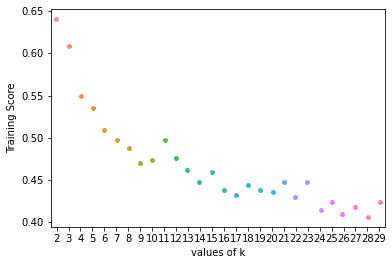

In [98]:
ax = sns.stripplot(K, training); 
ax.set(xlabel ='values of k', ylabel ='Training Score')   
  
plt.show() 

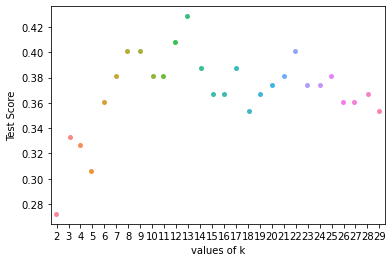

In [99]:
ax = sns.stripplot(K, test); 
ax.set(xlabel ='values of k', ylabel ='Test Score') 
plt.show()

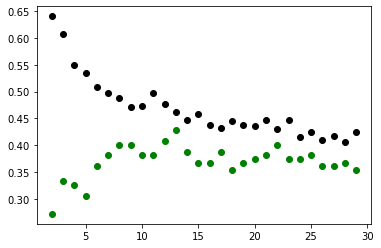

In [100]:
plt.scatter(K, training, color ='k') 
plt.scatter(K, test, color ='g') 
plt.show()

From the above scatter plot, we can come to the conclusion that the optimum value of k will be around 13.

In [101]:
knnc = KNeighborsClassifier(n_neighbors = 13)
knnc.fit(x_train, y_train) 
knnc.score(x_test, y_test)

0.42857142857142855

In [110]:
print("Mean accuracy score for AdaBoostClassifier ",cross_val_score(ADA,x,y,cv=3,scoring="accuracy").mean())
print("Standard Deviation accuracy for AdaBoostClassifier ",cross_val_score(ADA,x,y,cv=3,scoring="accuracy").std())
print()
print()
print("Mean accuracy for KNeighborsClassifier ",cross_val_score(knnc,x,y,cv=3,scoring="accuracy").mean())
print("Standard Deviation accuracy for KNeighborsClassifier ",cross_val_score(knnc,x,y,cv=3,scoring="accuracy").std())
print()
print()
print("Mean  for RandomForestRegressor ",cross_val_score(rfr,x,y,cv=3).mean())
print("Standard Deviation  for RandomForestRegressor ",cross_val_score(rfr,x,y,cv=3).std())
print()
print()
print("Mean accuracy for DecisionTreeRegressor ",cross_val_score(tree,x,y,cv=3).mean())
print("Standard Deviation accuracy for DecisionTreeRegressor ",cross_val_score(tree,x,y,cv=3).std())
print()
print()
print("Mean accuracy for RandomForestClassifier ",cross_val_score(R_forest,x,y,cv=3,scoring="accuracy").mean())
print("Standard Deviation accuracy for RandomTreeClassifier ",cross_val_score(R_forest,x,y,cv=3,scoring="accuracy").std())
print()
print()
print("Mean accuracy for GradientBoostingClassifier ",cross_val_score(GBR,x,y,cv=3,scoring="accuracy").mean())
print("Standard Deviation accuracy for GradientBoostingClassifier ",cross_val_score(GBR,x,y,cv=3,scoring="accuracy").std())

Mean accuracy score for AdaBoostClassifier  0.42740286298568514
Standard Deviation accuracy for AdaBoostClassifier  0.012606163605253526


Mean accuracy for KNeighborsClassifier  0.37014314928425357
Standard Deviation accuracy for KNeighborsClassifier  0.007651651097697227


Mean  for RandomForestRegressor  -0.15709235155703513
Standard Deviation  for RandomForestRegressor  0.012654330261874892


Mean accuracy for DecisionTreeRegressor  -0.11329801146952263
Standard Deviation accuracy for DecisionTreeRegressor  0.020814966512707925


Mean accuracy for RandomForestClassifier  0.4171779141104294
Standard Deviation accuracy for RandomTreeClassifier  0.01502754443425263


Mean accuracy for GradientBoostingClassifier  0.39263803680981596
Standard Deviation accuracy for GradientBoostingClassifier  0.03612172133467422


#### Choosing a Model:

Most of the above result shows the accuracy score above around 40 to 50 % where the maximum accuracy score is for random forest regressor 82.85% Also, test result for this model is : Root mean squared error:  0.913192549604442 R-squared:  -0.26386526518445774. 


The F1 Score is the 2*((precision * recall)/(precision+recall)). It is also called the F Score or the F Measure. Put another way, the F1 score conveys the balance between the precision and the recall which is showing more than 84% Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial. ... In most real-life classification problems, imbalanced class distribution exists and thus F1-score is a better metric to evaluate our model on.

Hence I am choosing rfr Random forest Regressor to be my best model in order to predict the target variable.

I request the Company to use product = Prototype 1 to which should be launched in the market.

#### Saving The File

In [118]:
import joblib

In [114]:
joblib.dump(rfr,'AB-InBev_Prototype_evaluation.obj')

['AB-InBev_Prototype_evaluation.obj']

In [115]:
#loading back the model:
model=joblib.load('AB-InBev_Prototype_evaluation.obj')

In [116]:
model

RandomForestRegressor(max_features='log2', n_estimators=50)

In [117]:
#Pridicting x_test rfr :  RandomForestRegressor(max_features='log2', n_estimators=50)
rfr.predict(x_test)

array([0.4       , 1.78      , 1.54      , 0.3       , 0.28      ,
       1.67      , 1.06      , 1.2       , 0.31933333, 0.38      ,
       1.04      , 1.72      , 1.22      , 0.42      , 1.14      ,
       1.74      , 1.32      , 0.96      , 1.64      , 1.48      ,
       0.36      , 0.44      , 1.56      , 1.04      , 0.78      ,
       1.52      , 1.432     , 1.59666667, 1.128     , 1.16      ,
       0.66      , 1.14      , 0.36      , 1.46      , 0.24      ,
       0.3       , 1.6       , 0.92      , 0.42      , 1.76      ,
       1.08      , 1.22      , 1.18      , 0.36      , 1.66      ,
       1.08      , 0.74      , 1.54      , 0.2       , 0.5       ,
       1.64      , 0.98      , 0.62      , 0.24      , 0.4       ,
       0.68      , 1.07333333, 0.62      , 1.02      , 1.46      ,
       1.16      , 1.56      , 1.2       , 1.6       , 1.02      ,
       1.22      , 1.17      , 1.64      , 1.82      , 1.62      ,
       1.26      , 1.16      , 0.3       , 0.44      , 1.04   